In [1]:
import tweepy 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import csv

def percentage(part,whole):
    return 100*float(part)/float(whole)


#Credentials for Twitter App. Get Your from apps.twitter.com

consumerKey = '***************************'
consumerSecret = '*****************************'
accessToken = '************************************'
accessTokenSecret = '*******************************'



#Establishing the connection

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))
lan=input("Enter the language:")
if (lan=="Hindi") or (lan=="hindi"):
    lan="hi"
if (lan=="English") or (lan=="english"):
    lan="en"
if (lan=="Arabic") or (lan=="arabic"):
    lan="ar"
else:
    print("Sorry! We don't support this language")
Text=[]

for tweet in tweepy.Cursor(api.search,q=searchTerm,lang=lan,since="2015-01-01",result_type='popular').items(noofsearchTerms/2):
    Text.append(tweet.text)
    
    
for tweet in tweepy.Cursor(api.search,q=searchTerm,lang=lan,since="2015-01-01").items(noofsearchTerms/2):
    Text.append(tweet.text)
    

d={
    'Text':Text
}

df=pd.DataFrame(d)

Enter the keyword/Hashtag to search about :Dubai
Enter the no. of tweets to analyze :50
Enter the language:arabic


In [8]:
for i in df['Text']:
    print(i)
    print("\n")
    
noofTerms=df.shape[0]

كيف انتصرت "موانئ دبي" في قضية محطة "دوارليه" جيبوتي؟
https://t.co/8GQ0wzb4yG


تم تجديد ملكية السيارة في دقائق معدودة عن طريق الجهاز المنتشر في المولات

شكراً #دبي المدينة الأذكى في العالم… https://t.co/sqyEyhDmEZ


شاهدوا كيف تنعش دبي الصيف برحلات مائية مكيفة
"العبرة" وسيلة نقل قديمة ، تعبر في المياه وتنقل الناس من ضفة إلى أخرى،… https://t.co/hUyowJEyPG


الحق يقال.. إنجازات الـ @RTA_Dubai وتطورها المستمر مفخرة! https://t.co/lfIPIAxqLT


هل ممكن تتزلج على الجليد في الصيف؟ أكيد ممكن! استمتع مع أصحابك في أول صالة تزلج داخلية في الشرق الأوسط! 
@skidxb 
ل… https://t.co/j4inz3ooTp


#دبي تسجل رقماً قياسياً جديداً في استقبال الزوّار الدوليين ليبلغ عددهم 8,10 مليون زائر خلال النصف الأول من العام ال… https://t.co/rIzONLWNzd


وول ستريت جورنال: المستثمرون في #دبي قلقون بخصوص قدرة #مركز_دبي_المالي على تحقيق التوازن بعد انهيار شركة الأسهم الت… https://t.co/KXMVVzyajy


دبي منحت جيبوتي مكاسب اقتصادية غير مسبوقة من إدارة ميناء دوراليه https://t.co/L50fWAbKTG


ضربة على رأس #تميم.. القضاء يقطع يد 

In [9]:
translated=[]
from googletrans import Translator

translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.cn',
    ])
translator = Translator()

for i in Text:
    try:
        translated.append((translator.translate(i)).text)
    except:
        pass
    


In [10]:
for i in translated:
    print(i)

How did Dubai Ports win in the case of the Douarleh station in Djibouti?
https://t.co/8GQ0wzb4yG
The ownership of the car was renewed in a few minutes by the machine deployed in the malls

Thank you # Dubai The smartest city in the world ... https://t.co/sqyEyhDmEZ
See how Dubai is reviving summer with its water-filled excursions
"Abra" is an ancient means of transportation, passing through the water and moving people from one bank to another, ... https://t.co/hUyowJEyPG
The truth is said .. The achievements of the @RTA_Dubai and its continuous development is a pride! https://t.co/lfIPIAxqLT
Is it possible to ski in summer? sure its possible! Enjoy your first indoor skateboard in the Middle East!
@skidxb
For ... https://t.co/j4inz3ooTp
# Dubai sets new record for 8,10 million visitors in the first half of the year ... https://t.co/rIzONLWNzd
Wall Street Journal: Investors in Dubai # are concerned about the ability of the financial center of Dubai to strike a balance after the collapse 

In [11]:
from textblob import TextBlob
positive=0
negative=0
neutral=0
polarity=0

for i in translated:
    analysis=TextBlob(i)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')



print("How people are reacting on "+ searchTerm +" by analyzing  "+" tweets.")


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")
    


How people are reacting on Dubai by analyzing   tweets.
Overall Polarity is Positive


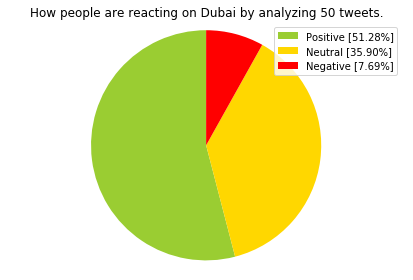

In [12]:
#Visualization


labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();